# Acesso ao SnowFlake com o Jupyter Notebook

## Necessário instalar no desktop ...
!pip install snowflake-connector-python   
!pip install snowflake-connector-python[pandas]   
!pip install --upgrade snowflake-sqlalchemy   

In [1]:
import getpass
pwd = getpass.getpass("Enter password:")

Enter password:········


In [2]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from snowflake.sqlalchemy import URL
import snowflake.connector

url = URL(
    account = 'aq93756.canada-central.azure',
    user = 'vsvasconcelos',
    password=str(pwd),
    database = 'covid_cidades',
    schema = 'public',
    warehouse= 'lakehouse',
    role = 'sysadmin',
)
engine = create_engine(url)
connection = engine.connect()

In [3]:
query = '''select * from casos'''
data = pd.read_sql(query, connection)

In [4]:
#Qual a quantidade de registros?
len(data)

1336186

In [5]:
data.count()

epi_week                           1336186
date                               1336186
country                            1336186
state                              1336186
city                               1336186
ibgeid                             1336186
newdeaths                          1336186
deaths                             1336186
newcases                           1336186
totalcases                         1336186
deaths_per_100k_inhabitants        1336186
totalcases_per_100k_inhabitants    1336186
deaths_by_totalcases               1336186
_source                            1335600
last_info_date                     1335600
dtype: int64

In [6]:
#Quais os tipos de cada uma das variáveis?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336186 entries, 0 to 1336185
Data columns (total 15 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   epi_week                         1336186 non-null  int64  
 1   date                             1336186 non-null  object 
 2   country                          1336186 non-null  object 
 3   state                            1336186 non-null  object 
 4   city                             1336186 non-null  object 
 5   ibgeid                           1336186 non-null  int64  
 6   newdeaths                        1336186 non-null  int64  
 7   deaths                           1336186 non-null  int64  
 8   newcases                         1336186 non-null  int64  
 9   totalcases                       1336186 non-null  int64  
 10  deaths_per_100k_inhabitants      1336186 non-null  float64
 11  totalcases_per_100k_inhabitants  1336186 non-null 

In [7]:
#Quais são o primeiros dados?
data.head(3)

,epi_week,date,country,state,city,ibgeid,newdeaths,deaths,newcases,totalcases,deaths_per_100k_inhabitants,totalcases_per_100k_inhabitants,deaths_by_totalcases,_source,last_info_date
0,47,2020-11-19,Brazil,CE,Tamboril/CE,2313203,0,7,2,471,26.71858,1797.77854,0.01486,SES,2021-09-16
1,47,2020-11-19,Brazil,SP,Tanabi/SP,3553401,0,29,6,1418,110.55621,5405.81754,0.02045,SES,2021-10-01
2,47,2020-11-19,Brazil,MT,Tangará da Serra/MT,5107958,0,83,15,5969,77.11533,5545.80000,0.01391,MS,2021-10-09


In [8]:
#Quais são os últimos dados?
data.tail(3)

,epi_week,date,country,state,city,ibgeid,newdeaths,deaths,newcases,totalcases,deaths_per_100k_inhabitants,totalcases_per_100k_inhabitants,deaths_by_totalcases,_source,last_info_date
1336183,47,2020-11-19,Brazil,SC,Taió/SC,4217808,0,5,17,520,26.91645,2799.31094,0.00962,SES,2021-10-07
1336184,47,2020-11-19,Brazil,PR,Tamarana/PR,4126678,0,9,2,230,58.91209,1505.53119,0.03913,SES,2021-09-22
1336185,47,2020-11-19,Brazil,SP,Tambaú/SP,3553302,0,11,1,478,47.30166,2055.47194,0.02301,SES,2021-10-01


In [9]:
data.sort_values(['date']).head(3)

,epi_week,date,country,state,city,ibgeid,newdeaths,deaths,newcases,totalcases,deaths_per_100k_inhabitants,totalcases_per_100k_inhabitants,deaths_by_totalcases,_source,last_info_date
881530,9,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.0,0.00807,0.0,SES,2021-10-01
881531,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,0,1,1,0.0,0.00047,0.0,None,None
881532,9,2020-02-28,Brazil,SP,São Paulo/SP,3550308,0,0,1,2,0.0,0.01613,0.0,SES,2021-10-01


In [10]:
data.sort_values(['date']).tail(5)

,epi_week,date,country,state,city,ibgeid,newdeaths,deaths,newcases,totalcases,deaths_per_100k_inhabitants,totalcases_per_100k_inhabitants,deaths_by_totalcases,_source,last_info_date
880369,140,2021-10-09,Brazil,PI,Floriano/PI,2203909,0,164,1,9000,272.82860,14972.30124,0.01822,SES,2021-10-09
880368,140,2021-10-09,Brazil,BA,Floresta Azul/BA,2911006,0,19,-1,841,180.52257,7990.49881,0.02259,MS,2021-10-09
880367,140,2021-10-09,Brazil,RS,Flores da Cunha/RS,4308201,0,69,6,5559,220.08165,17730.92626,0.01241,MS,2021-10-09
880378,140,2021-10-09,Brazil,SP,Franca/SP,3516200,3,914,11,38516,254.92345,10742.48548,0.02373,MS,2021-10-09
880260,140,2021-10-09,Brazil,SP,Cotia/SP,3513009,0,646,65,16284,250.50217,6314.51594,0.03967,MS,2021-10-09


In [11]:
print(data.columns)


Index(['epi_week', 'date', 'country', 'state', 'city', 'ibgeid', 'newdeaths',
       'deaths', 'newcases', 'totalcases', 'deaths_per_100k_inhabitants',
       'totalcases_per_100k_inhabitants', 'deaths_by_totalcases', '_source',
       'last_info_date'],
      dtype='object')


In [12]:
#Retirando as linhas TOTAL, Ordenando por data e Selecionando apenas algumas colunas
data_ord = data.query("state != 'TOTAL'").sort_values(['date'])[['date', 'state','city', 'newdeaths', 
                                                                  'deaths', 'newcases', 'totalcases']]

In [13]:
#Quais os dias que mais morreram pessoas?
df = data_ord.groupby(data_ord['date'])['newdeaths'].sum().sort_values(ascending=False)
df

date
2021-04-08    4148
2021-04-06    4068
2021-03-31    3925
2021-04-13    3757
2021-04-09    3752
              ... 
2020-03-12       0
2020-03-13       0
2020-03-14       0
2020-03-15       0
2020-02-25       0
Name: newdeaths, Length: 586, dtype: int64

<AxesSubplot:xlabel='date'>

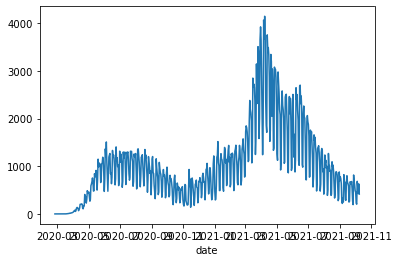

In [14]:
df.plot(x="date", y="newdeaths")

In [15]:
#Em quais cidades mais morreram pessoas?
df = data_ord.groupby(data_ord['city'])['newdeaths'].sum().sort_values(ascending=False)
df

city
São Paulo/SP                        38506
Rio de Janeiro/RJ                   34494
Brasília/DF                         10594
Fortaleza/CE                         9728
Manaus/AM                            9472
                                    ...  
Serra Azul de Minas/MG                  0
CASO SEM LOCALIZAÇÃO DEFINIDA/SC        0
Novo Horizonte/SC                       0
Pedro Teixeira/MG                       0
CASO SEM LOCALIZAÇÃO DEFINIDA/RO        0
Name: newdeaths, Length: 5596, dtype: int64

<AxesSubplot:xlabel='date'>

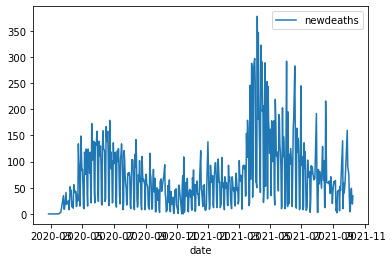

In [16]:
data_ord[data_ord.city == "São Paulo/SP"].plot(x="date", y="newdeaths")

## Fontes de consulta:

[One-stop-shop for Connecting Snowflake to Python!](https://www.analyticsvidhya.com/blog/2021/05/one-stop-shop-for-connecting-snowflake-to-python/)   
[Connecting Jupyter Notebooks to Snowflake for Data Science](https://www.youtube.com/watch?v=HBvZc3-WEEQ)   
[covid19br: examples with pandas (Python)](https://colab.research.google.com/drive/1H1N387IIAGV-3YRtyxzPz94vSiLrhE0M?usp=sharing#scrollTo=42Z5j9yuBuz6)   
[Hands on SnowFlake](https://quickstarts.snowflake.com/guide/getting_started_with_snowflake/index.html#0)